In [90]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [109]:
def gerar_dataframe(qtd=500_00, seed=42): 
    import numpy as np
    import pandas as pd

    np.random.seed(seed)

    # Gerar dados básicos
    id_funcionario = np.arange(1, qtd + 1)
    idade = np.random.randint(18, 60, size=qtd)
    genero = np.random.choice(['Masculino', 'Feminino', 'Prefiro não informar'], size=qtd, p=[0.45, 0.35, 0.20])
    estado_civil = np.random.choice(['Solteiro(a)', 'Casado(a)', 'Divorciado(a)', 'Prefiro não informar'], size=qtd)
    escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós', 'Mestrado', 'Doutorado', 'Prefiro não informar'], size=qtd)
    cor_raca = np.random.choice(['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Prefiro não informar'], size=qtd)
    filhos = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    nacionalidade = np.random.choice(['Brasileira', 'Estrangeira', 'Prefiro não informar'], size=qtd)
    naturalidade = np.random.choice(['SP', 'RJ', 'MG', 'Outros', 'Prefiro não informar'], size=qtd)
    tipo_moradia = np.random.choice(['Alugada', 'Própria', 'Compartilhada', 'Prefiro não informar'], size=qtd)
    pcd = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.05, 0.95])
    estado_uf = np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS', 'CE', 'DF', 'PE', 'AM', 'MT', 'PR', 'AL', 'SC', ' ', 'Não informado'], size=qtd)

    area_formacao = np.random.choice([
        'Cientista de Dados/Data Scientist', 'Desenvolvedor', 'Engenharia de Software', 'Marketing',
        'RH', 'Product Manager/PO', 'Analista de Dados/Data Analyst', 'Administrativo', 'Financeiro',
        'Vendas', 'Pesquisa e Desenvolvimento', 'Engenharia de Dados/Data Engineer', 'UX/UI',
        'Suporte Técnico', 'Prefiro não informar'], size=qtd)

    departamento = np.random.choice(['Vendas', 'RH', 'TI', 'Pesquisa', 'Negócio'], size=qtd)
    cargo = np.random.choice([
        'Especialista', 'Gestor?', 'Cargo como Gestor?', 'Tempo de experiência na área',
        'Gerente', 'Senior', 'Pleno', 'Junior', 'Estagiário', 'Prefiro não informar'], size=qtd)

    envolvimento = np.random.randint(1, 5, size=qtd)
    anos_empresa = np.random.randint(0, 41, size=qtd)
    promocoes = np.random.randint(0, 6, size=qtd)
    salario = np.random.randint(1500, 25000, size=qtd)
    faixa_salarial = pd.cut(salario, bins=[0, 3000, 7000, 12000, 18000, np.inf],
                            labels=['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta'])
    aumento = np.random.randint(0, 30, size=qtd)
    nivel_acao = np.random.randint(0, 4, size=qtd)

    sat_trabalho = np.random.randint(1, 6, size=qtd)
    sat_ambiente = np.random.randint(1, 6, size=qtd)
    sat_relacionamento = np.random.randint(1, 6, size=qtd)
    sat_beneficios = np.random.randint(1, 6, size=qtd)

    hora_extra = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.3, 0.7])
    equilibrio = np.random.randint(1, 5, size=qtd)
    viagem = np.random.choice(['Nunca', 'Raramente', 'Frequentemente'], size=qtd)
    distancia = np.random.randint(1, 50, size=qtd)
    avaliacao = np.random.choice([3, 4], size=qtd, p=[0.9, 0.1])
    treinamentos = np.random.randint(0, 6, size=qtd)

    pretende_mudar = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd, p=[0.3, 0.6, 0.1])
    futuro_empresa = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    expectativa_crescimento = np.random.choice(['Alta', 'Média', 'Baixa', 'Prefiro não informar'], size=qtd)

    motivo_mudanca = np.random.choice(['Salário', 'Home Office', 'Ambiente de trabalho', 'Desenvolvimento profissional', 'Mudança de cidade', 'Não responder'], size=qtd)
    afastamentos = np.random.randint(0, 4, size=qtd)
    atestados = np.random.randint(0, 10, size=qtd)

    saiu_empresa = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.16, 0.84])
    saiu_empresa = pd.Categorical(saiu_empresa, categories=['Sim', 'Não'], ordered=True)

    df = pd.DataFrame({
        'ID Funcionário': id_funcionario,
        'Idade': idade,
        'Gênero': genero,
        'Estado Civil': estado_civil,
        'Escolaridade': escolaridade,
        'Cor/Raça': cor_raca,
        'Filhos': filhos,
        'Nacionalidade': nacionalidade,
        'Naturalidade': naturalidade,
        'Tipo de Moradia': tipo_moradia,
        'PCD': pcd,
        'Estado/UF': estado_uf,
        'Área de Formação': area_formacao,
        'Departamento': departamento,
        'Cargo': cargo,
        'Envolvimento no Trabalho': envolvimento,
        'Anos na Empresa': anos_empresa,
        'Número de Promoções': promocoes,
        'Salário Mensal': salario,
        'Faixa Salarial': faixa_salarial,
        'Aumento Salarial (%)': aumento,
        'Nível de Opção de Ação': nivel_acao,
        'Satisfação no Trabalho': sat_trabalho,
        'Satisfação com o Ambiente de Trabalho': sat_ambiente,
        'Satisfação com Relacionamento no Trabalho': sat_relacionamento,
        'Satisfação com os Benefícios': sat_beneficios,
        'Hora Extra': hora_extra,
        'Equilíbrio Vida-Trabalho': equilibrio,
        'Viagem a Negócios': viagem,
        'Distância Casa (km)': distancia,
        'Avaliação de Desempenho (1-5)': avaliacao,
        'Treinamentos por Ano': treinamentos,
        'Pretende Mudar de Emprego?': pretende_mudar,
        'Você se vê na empresa em 5 anos?': futuro_empresa,
        'Expectativa de Crescimento': expectativa_crescimento,
        'Motivo da Mudança de Emprego': motivo_mudanca,
        'Histórico de Afastamentos': afastamentos,
        'Número de Atestados': atestados,
        'Saiu da Empresa?': saiu_empresa
    })

    colunas_nulas = ['Salário Mensal', 'Área de Formação', 'Satisfação no Trabalho', 'Anos na Empresa']
    for coluna in colunas_nulas:
        qtd_nulo = int(qtd * 0.05)
        indices_nulo = np.random.choice(df.index, qtd_nulo, replace=False)
        df.loc[indices_nulo, coluna] = np.nan

    colunas_numericas = [
        'Salário Mensal', 'Anos na Empresa', 'Idade', 'Envolvimento no Trabalho',
        'Aumento Salarial (%)', 'Nível de Opção de Ação', 'Satisfação no Trabalho',
        'Satisfação com o Ambiente de Trabalho', 'Satisfação com Relacionamento no Trabalho',
        'Equilíbrio Vida-Trabalho', 'Distância Casa (km)', 'Avaliação de Desempenho (1-5)',
        'Treinamentos por Ano'
    ]
    for coluna in colunas_numericas:
        qtd_neg = int(qtd * 0.01)
        indices_neg = np.random.choice(df.index, qtd_neg, replace=False)
        df.loc[indices_neg, coluna] *= -1

    variacoes = {
        'Desenvolvedor': ['Desenvolvedor ', 'Dev', 'desenvolvedor'],
        'Cientista de Dados/Data Scientist': ['Cientista de Dados', 'Data Scientist', 'DS']
    }
    for original, alteracoes in variacoes.items():
        indices = df[df['Área de Formação'] == original].sample(frac=0.1, replace=False, random_state=seed).index
        if not indices.empty:
            df.loc[indices, 'Área de Formação'] = np.random.choice(alteracoes, size=len(indices))

    indices_uf = df.sample(frac=0.005, replace=False, random_state=seed).index
    df.loc[indices_uf, 'Estado/UF'] = 'XX'

    indices_outlier_salario = df.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_outlier_salario, 'Salário Mensal'] = np.random.randint(50000, 100000, size=len(indices_outlier_salario))

  
    jovens = df[df['Idade'] < 30]
    indices_jovens = jovens.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_jovens, 'Anos na Empresa'] = df.loc[indices_jovens, 'Idade'] + np.random.randint(5, 15, size=len(indices_jovens))

   
    indices_cargo = df.sample(frac=0.005, replace=False, random_state=seed).index
    indices_validos = indices_cargo[df.loc[indices_cargo, 'Anos na Empresa'].notna() & (df.loc[indices_cargo, 'Anos na Empresa'] >= 0)]
    df.loc[indices_validos, 'Cargo'] = 'Tempo: ' + (df.loc[indices_validos, 'Anos na Empresa'] + np.random.randint(1, 5, size=len(indices_validos))).astype(str)

    return df


In [110]:
df_funcionarios = gerar_dataframe(qtd=500_00, seed=42)

In [111]:
df_funcionarios.head(150)


,ID Funcionário,Idade,Gênero,Estado Civil,Escolaridade,Cor/Raça,Filhos,Nacionalidade,Naturalidade,Tipo de Moradia,...,Distância Casa (km),Avaliação de Desempenho (1-5),Treinamentos por Ano,Pretende Mudar de Emprego?,Você se vê na empresa em 5 anos?,Expectativa de Crescimento,Motivo da Mudança de Emprego,Histórico de Afastamentos,Número de Atestados,Saiu da Empresa?
0,1,56,Feminino,Prefiro não informar,Prefiro não informar,Prefiro não informar,Sim,Estrangeira,SP,Própria,...,-39,3,3,Não,Prefiro não informar,Alta,Desenvolvimento profissional,0,4,Não
1,2,46,Masculino,Divorciado(a),Pós,Branca,Não,Brasileira,RJ,Compartilhada,...,38,3,3,Sim,Não,Prefiro não informar,Home Office,1,7,Sim
2,3,32,Feminino,Solteiro(a),Doutorado,Indígena,Prefiro não informar,Brasileira,SP,Prefiro não informar,...,6,3,1,Sim,Sim,Alta,Desenvolvimento profissional,1,7,Não
3,4,25,Feminino,Divorciado(a),Graduação,Branca,Não,Brasileira,MG,Compartilhada,...,46,3,1,Não,Não,Baixa,Salário,1,2,Não
4,5,38,Masculino,Casado(a),Mestrado,Indígena,Sim,Estrangeira,MG,Prefiro não informar,...,42,3,1,Prefiro não informar,Sim,Baixa,Ambiente de trabalho,3,6,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,45,Masculino,Prefiro não informar,Doutorado,Parda,Não,Brasileira,MG,Alugada,...,43,3,0,Prefiro não informar,Prefiro não informar,Prefiro não informar,Home Office,0,2,Sim
146,147,19,Masculino,Prefiro não informar,Mestrado,Amarela,Não,Brasileira,MG,Alugada,...,6,3,4,Sim,Sim,Alta,Não responder,3,6,Sim
147,148,59,Masculino,Casado(a),Ensino Médio,Amarela,Sim,Estrangeira,RJ,Alugada,...,41,3,5,Sim,Prefiro não informar,Média,Não responder,3,0,Sim
148,149,23,Masculino,Casado(a),Prefiro não informar,Preta,Sim,Estrangeira,MG,Prefiro não informar,...,12,3,2,Sim,Prefiro não informar,Baixa,Mudança de cidade,3,7,Não


In [112]:
display(df_funcionarios.columns)

Index(['ID Funcionário', 'Idade', 'Gênero', 'Estado Civil', 'Escolaridade',
       'Cor/Raça', 'Filhos', 'Nacionalidade', 'Naturalidade',
       'Tipo de Moradia', 'PCD', 'Estado/UF', 'Área de Formação',
       'Departamento', 'Cargo', 'Envolvimento no Trabalho', 'Anos na Empresa',
       'Número de Promoções', 'Salário Mensal', 'Faixa Salarial',
       'Aumento Salarial (%)', 'Nível de Opção de Ação',
       'Satisfação no Trabalho', 'Satisfação com o Ambiente de Trabalho',
       'Satisfação com Relacionamento no Trabalho',
       'Satisfação com os Benefícios', 'Hora Extra',
       'Equilíbrio Vida-Trabalho', 'Viagem a Negócios', 'Distância Casa (km)',
       'Avaliação de Desempenho (1-5)', 'Treinamentos por Ano',
       'Pretende Mudar de Emprego?', 'Você se vê na empresa em 5 anos?',
       'Expectativa de Crescimento', 'Motivo da Mudança de Emprego',
       'Histórico de Afastamentos', 'Número de Atestados', 'Saiu da Empresa?'],
      dtype='object')

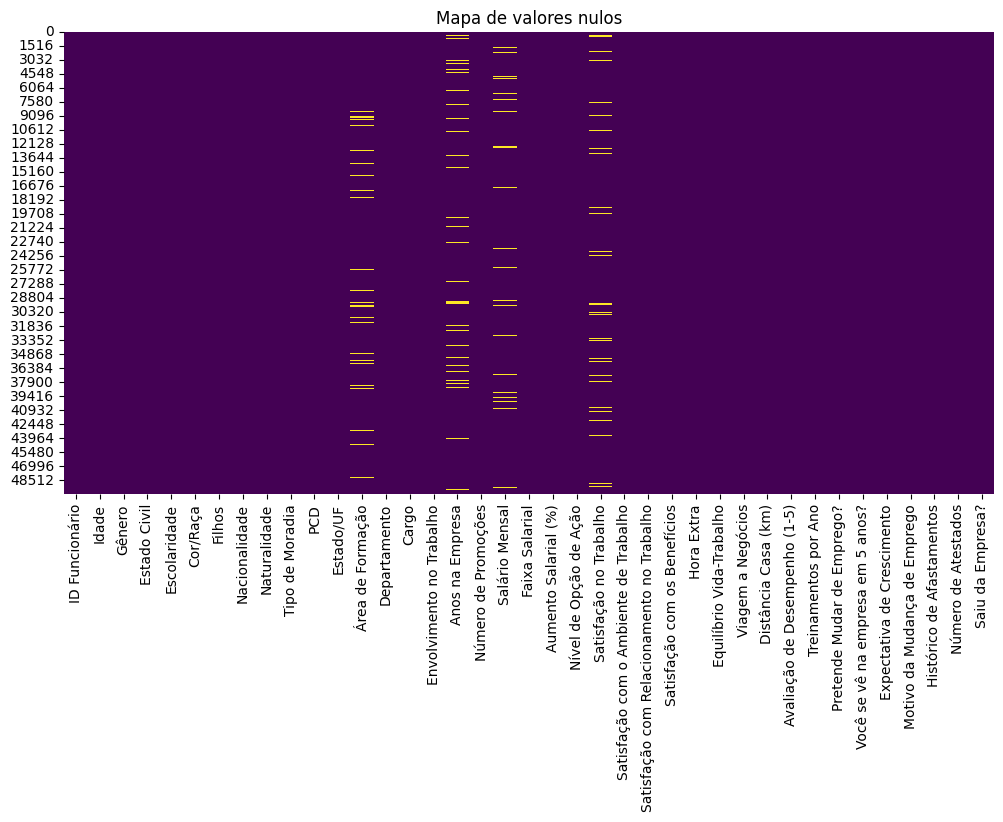

In [113]:
df_funcionarios.isnull().sum()

plt.figure(figsize=(12, 6))
sns.heatmap(df_funcionarios.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos")
plt.show()

In [114]:
limite = len(df_funcionarios) * 0.5
df_funcionarios = df_funcionarios.dropna(thresh=limite, axis=1)

df_funcionarios = df_funcionarios.dropna()

In [115]:
if df_funcionarios['Salário Mensal'].notna().any():
	df_funcionarios['Salário Mensal'] = df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].mean())

if df_funcionarios['Anos na Empresa'].notna().any():
	df_funcionarios['Anos na Empresa'] = df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median())

moda_area = df_funcionarios['Área de Formação'].mode()
if not moda_area.empty:
	df_funcionarios['Área de Formação'] = df_funcionarios['Área de Formação'].fillna(moda_area[0])

In [116]:
# Verificar novamente os nulos após a imputação
print("\nContagem de valores nulos após imputação:")
print(df_funcionarios.isnull().sum().sort_values(ascending=False))



Contagem de valores nulos após imputação:
ID Funcionário                               0
Idade                                        0
Gênero                                       0
Estado Civil                                 0
Escolaridade                                 0
Cor/Raça                                     0
Filhos                                       0
Nacionalidade                                0
Naturalidade                                 0
Tipo de Moradia                              0
PCD                                          0
Estado/UF                                    0
Área de Formação                             0
Departamento                                 0
Cargo                                        0
Envolvimento no Trabalho                     0
Anos na Empresa                              0
Número de Promoções                          0
Salário Mensal                               0
Faixa Salarial                               0
Aumento Salarial 

In [117]:
df_funcionarios['Estado/UF'].unique()


df_funcionarios['Estado/UF'] = df_funcionarios['Estado/UF'].replace(['XX', ' ', 'Não informado'], np.nan)

df_funcionarios['Estado/UF'] = df_funcionarios['Estado/UF'].fillna(df_funcionarios['Estado/UF'].mode()[0])


C:\Users\taili\AppData\Local\Temp\ipykernel_48680\4156626352.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios[col].fillna(mediana, inplace=True)
C:\Users\taili\AppData\Local\Temp\ipykernel_48680\4156626352.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

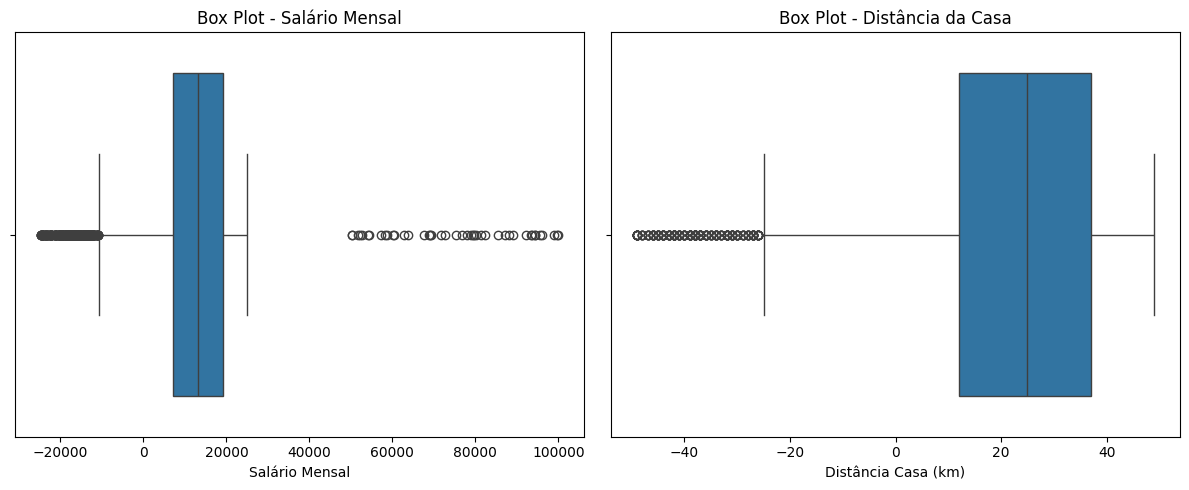

In [118]:
colunas = ['Salário Mensal', 'Distância Casa (km)']

for col in colunas:
    if col in df_funcionarios.columns:
        if df_funcionarios[col].dropna().empty:
            print(f"A coluna '{col}' está vazia ou só tem NaNs.")
        elif not np.issubdtype(df_funcionarios[col].dtype, np.number):
            print(f"A coluna '{col}' não é numérica.")
        else:
            mediana = df_funcionarios[col].median()
            df_funcionarios[col].fillna(mediana, inplace=True)
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if df_funcionarios['Salário Mensal'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Salário Mensal')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Salário Mensal'])
    plt.title('Box Plot - Salário Mensal')

plt.subplot(1, 2, 2)
if df_funcionarios['Distância Casa (km)'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Distância da Casa')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Distância Casa (km)'])
    plt.title('Box Plot - Distância da Casa')

plt.tight_layout()
plt.show()

In [106]:
df_funcionarios['Salário Mensal'].describe()

count    40732.000000
mean     13096.014829
std       7563.395894
min     -24744.000000
25%       7192.000000
50%      13202.500000
75%      19160.000000
max      99875.000000
Name: Salário Mensal, dtype: float64

In [107]:
df_funcionarios['Salário Mensal'].isna().sum()

np.int64(0)

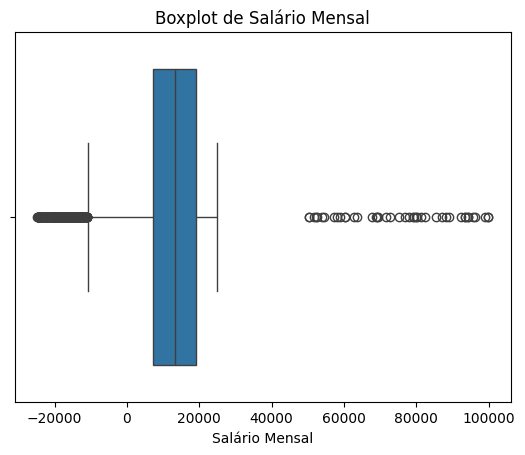

In [119]:
sns.boxplot(data=df_funcionarios, x='Salário Mensal')
plt.title("Boxplot de Salário Mensal")
plt.show()

# Remover outliers extremos (acima de 3 desvios padrão)
media = df_funcionarios['Salário Mensal'].mean()
desvio = df_funcionarios['Salário Mensal'].std()
limite_superior = media + 3 * desvio
df_funcionarios = df_funcionarios[df_funcionarios['Salário Mensal'] <= limite_superior]

In [120]:
df_funcionarios.to_csv("dados_funcionarios.csv", index=False)